Dataset Description


The MPG dataset is technical spec of cars originaly provided from UCI Machine Learning Repository. The data concerns city-cycle fuel consumption 

in miles per gallon to be analyzed in terms of 3 multivalued discrete and 5 continuous attributes.


Columns Description


mpg: miles per galon of fuel (continuous variable).

cylinders: number of engine cylinders (multi-valued discrete variable).

displacement: (continuous variable)

horsepower: the power produced by engine to move the car (continuous variable)

weight: car weight (continuous variable)

acceleration: the acceleration an engine can get per second (continuous variable)

model year: car release year from 1970 to 1982(multi-valued discrete variable)

origin: car manufacturing place (1 -> USA, 2 -> Europe, 3 -> Asia) (multi-valued discrete variable)

car name: car model name (unique for each instance)

Environment set-up

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
mpg_filepath='auto-mpg.csv'
mpg_df=pd.read_csv(mpg_filepath)

In [26]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [27]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [28]:
mpg_df.duplicated().sum()

0

horsepower column have inconsistant data type.


In [29]:
mpg_df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [30]:
mpg_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [31]:
(mpg_df['horsepower']=='?').sum()

6

It seems like we have 6 values in horsepower column containing ?, and that is what is giving us the object data type instead of int.

Exploring Summary

Our dataset has a total of 398 records and 9 columns.

We have no NaNs in our dataset nor duplicated rows.

horsepower column have inconsistant data type that needs to be handled and casted to int.

origin would need to be parsed and casted into a categorical datatype.

No columns would need to be dropped.

Data Cleaning

Here, we'd perform cleaning operations (dropping rows, mapping columns, converting data types). All of which would help us reach a more accurate 
result in creating meaningful and informative visualizations.

Cleaning horsepower column

We'd drop each row that contains a ? on the horsepower column.

In [32]:
mpg_df=mpg_df[mpg_df.horsepower!='?']
(mpg_df.horsepower == '?').sum()

0

In [33]:
mpg_df.horsepower = mpg_df.horsepower.astype(int)
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


Handling origin column

We'd map origin column according to the provided description (1 -> USA, 2 -> Europe, 3 -> Asia), and cast its datatype as category.

In [34]:
mpg_df.loc[mpg_df.origin == 1, 'origin'] = 'USA'
mpg_df.loc[mpg_df.origin == 2, 'origin'] = 'Europe'
mpg_df.loc[mpg_df.origin == 3, 'origin'] = 'Asia'
mpg_df['origin'] = mpg_df['origin'].astype('category')
mpg_df['origin'].dtype

C:\Users\Asus\AppData\Local\Temp\ipykernel_6904\3331142314.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'USA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mpg_df.loc[mpg_df.origin == 1, 'origin'] = 'USA'


CategoricalDtype(categories=['Asia', 'Europe', 'USA'], ordered=False, categories_dtype=object)

Now, our dataframe is tidy and clean, and we are ready to move into visualizing it to get some meaningful insights!

Data Visualization

In this section, we'd use some informative visuals to help us draw insights and conclusions about our data and also help us in our EDA.

Let's first have a quick look at the summery statistics of our dataset.

In [35]:
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [38]:
corr = mpg_df.select_dtypes(include=['int64', 'float64']).corr()

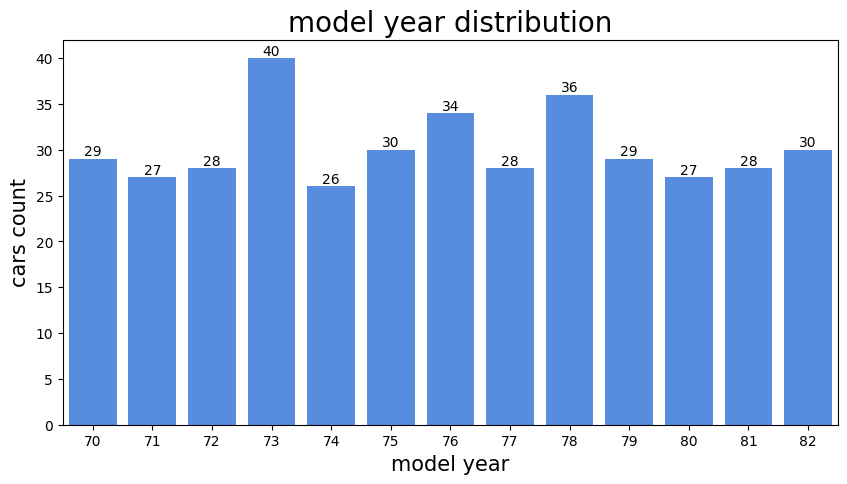

In [39]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'model year', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("model year distribution", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

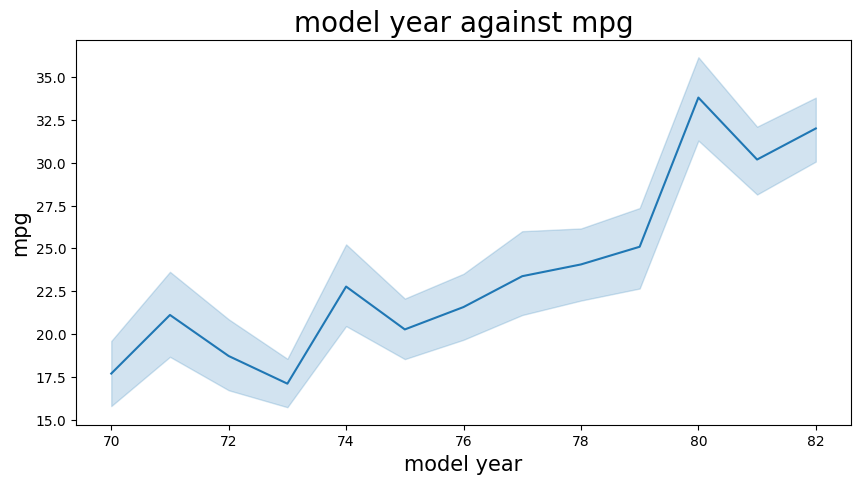

In [40]:
plt.figure(figsize=(10,5))
plt.title("model year against mpg", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
sns.lineplot(x = 'model year', y = 'mpg', data = mpg_df);

Now, let's take a closer look at mpg coulmn.

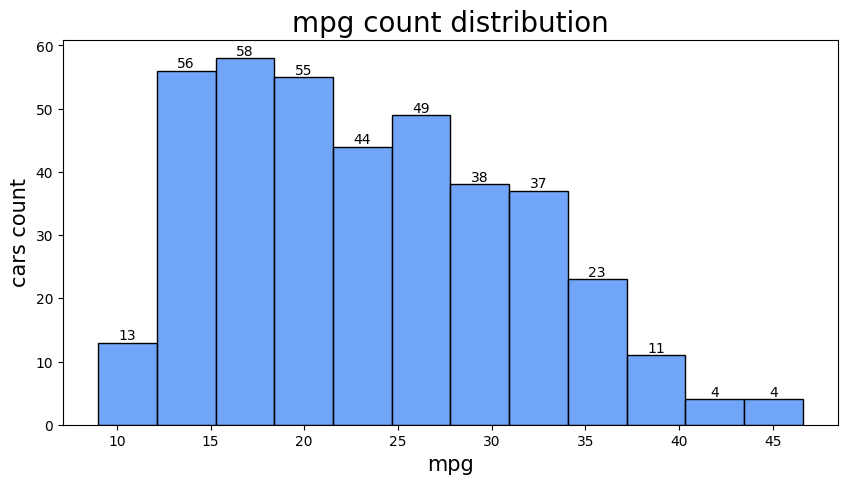

In [41]:
plt.figure(figsize=(10,5))
ax = sns.histplot(x = 'mpg', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("mpg count distribution", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

Most of the cars in our dataset have mpg between 15 to 20. Our data is also skewed to the right.

Let's compare these findings to cylinders and horsepower columns.

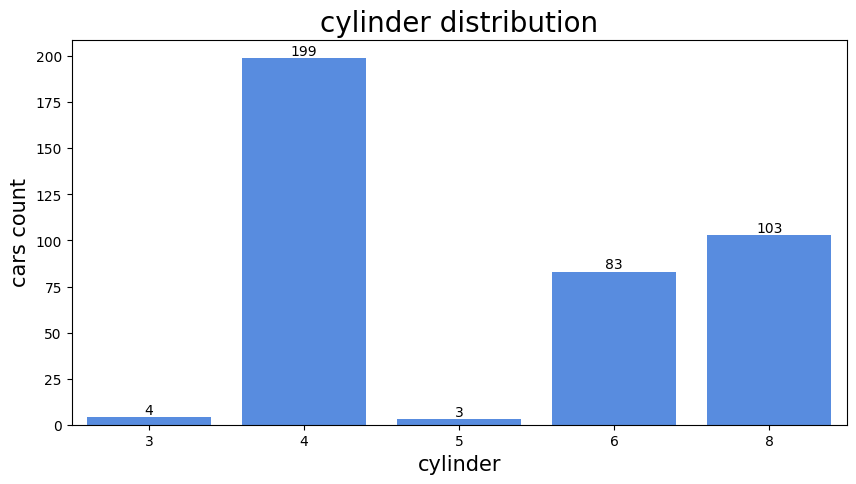

In [42]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'cylinders', data = mpg_df, color = '#4287f5')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("cylinder distribution", fontsize = 20)
plt.xlabel("cylinder", fontsize = 15)
plt.ylabel("cars count", fontsize = 15)
plt.show()

The vast majority in cars have 4 cylinder engine.

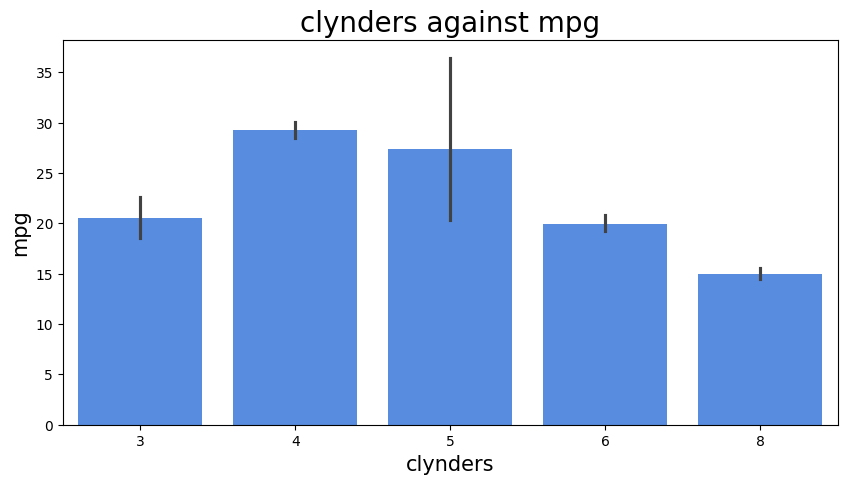

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'cylinders', y = 'mpg', data = mpg_df, color = '#4287f5')
plt.title("clynders against mpg", fontsize = 20)
plt.xlabel("clynders", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

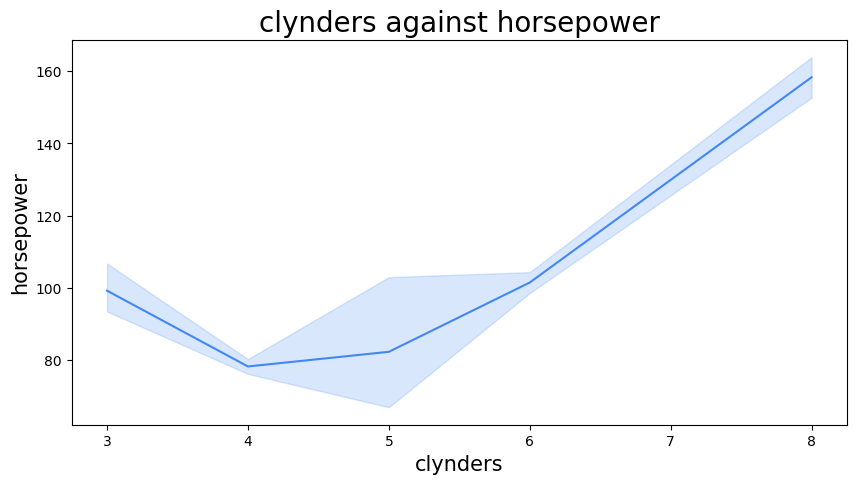

In [44]:
plt.figure(figsize=(10,5))
sns.lineplot(x = 'cylinders', y = 'horsepower', data = mpg_df, color = '#4287f5')
plt.title("clynders against horsepower", fontsize = 20)
plt.xlabel("clynders", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

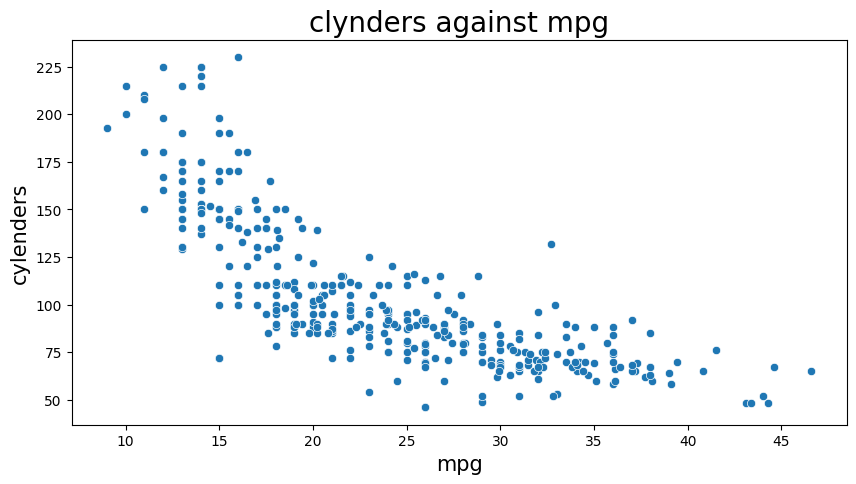

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'mpg', y = 'horsepower', data = mpg_df)
plt.title("clynders against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("cylenders", fontsize = 15)
plt.show()

From the above visuals, we can notice that:

As cylinders in the engine increases above 4, MPG decreases.

As cylinders in the engine increases above 4, engine horsepower increases.

there is negative correlation between mpg and horsepower.

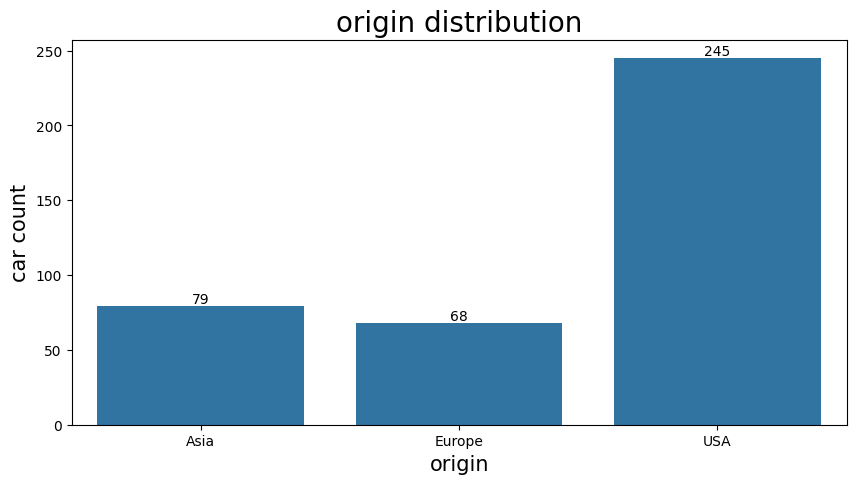

In [46]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'origin', data = mpg_df)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("origin distribution", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

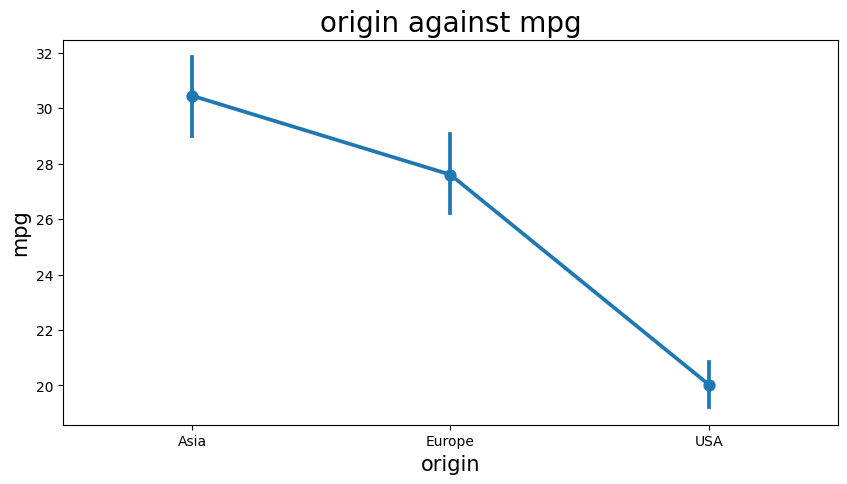

In [47]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'mpg', data = mpg_df)
plt.title("origin against mpg", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

Althogh USA has the biggest count of our dataset, it produces cars we relatively very low mpg compared to Asia and Europe

Asia is the leading contry in producing cars with high mpg with a mean close to 30.

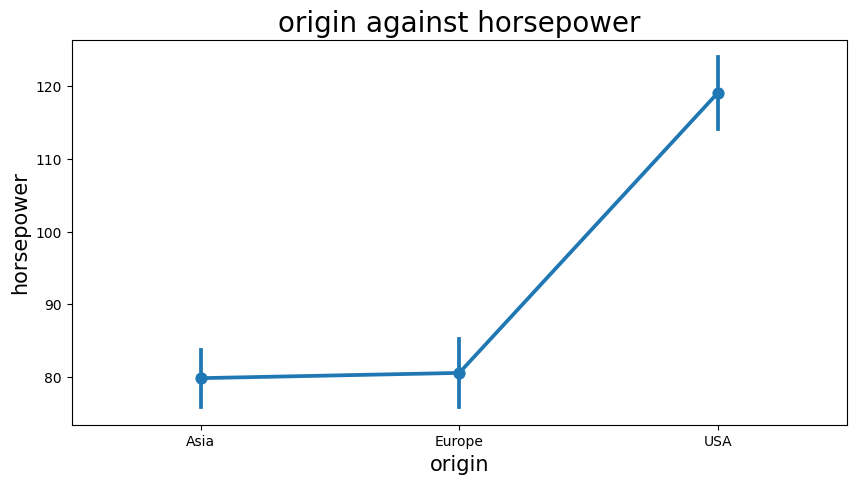

In [48]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'origin', y = 'horsepower', data = mpg_df)
plt.title("origin against horsepower", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("horsepower", fontsize = 15)
plt.show()

As expected, USA has the highest engine horsepower. This implies the previously observed conclusion that hoursepower and mpg has a negative correlation.

C:\Users\Asus\AppData\Local\Temp\ipykernel_6904\2067465216.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = mpg_df, ci = None);


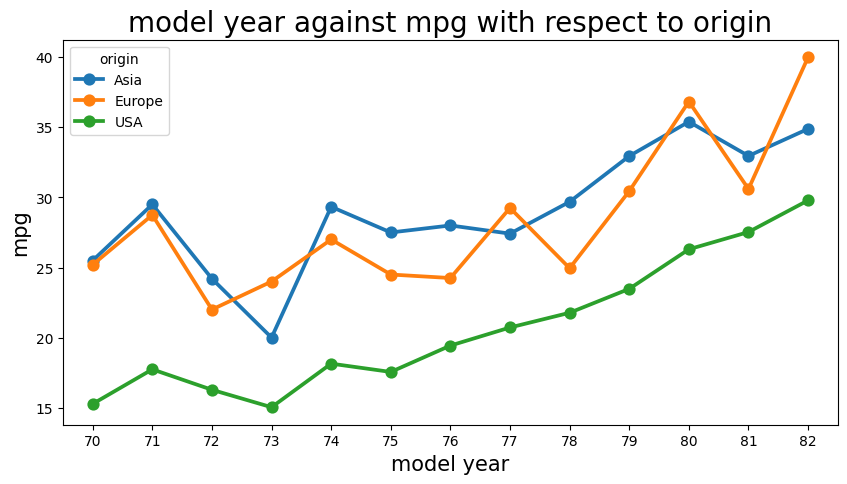

In [50]:
plt.figure(figsize=(10,5))
sns.pointplot(x = 'model year', y = 'mpg', hue = 'origin', data = mpg_df, ci = None);
plt.title("model year against mpg with respect to origin", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("mpg", fontsize = 15)
plt.show()

This chart also implies the positive correlation between model year and mpg, and shows that Asia has been leading country in this industry, followed by Europe and USA comes in the last place.

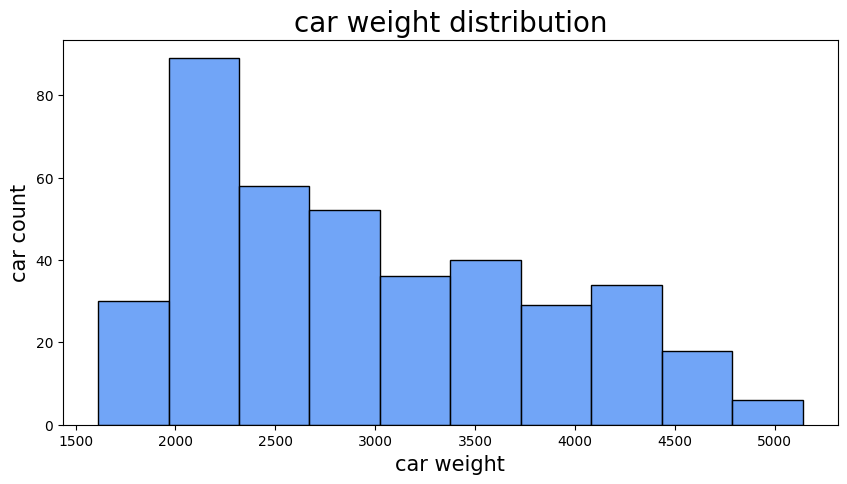

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'weight', data = mpg_df, color = '#4287f5')
plt.title("car weight distribution", fontsize = 20)
plt.xlabel("car weight", fontsize = 15)
plt.ylabel("car count", fontsize = 15)
plt.show()

car weight varies from 1500 to 5000, with the majority of cars at 2000.

C:\Users\Asus\AppData\Local\Temp\ipykernel_6904\1031872803.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = 'model year', y = 'weight', data = mpg_df,


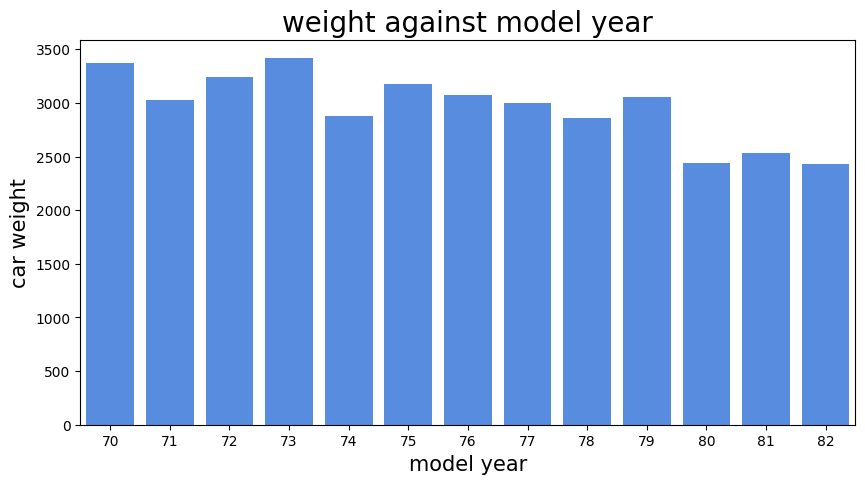

In [52]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'model year', y = 'weight', data = mpg_df,
                 color = '#4287f5', ci = None)
plt.title("weight against model year", fontsize = 20)
plt.xlabel("model year", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

Car weight has been decreasing over the years.

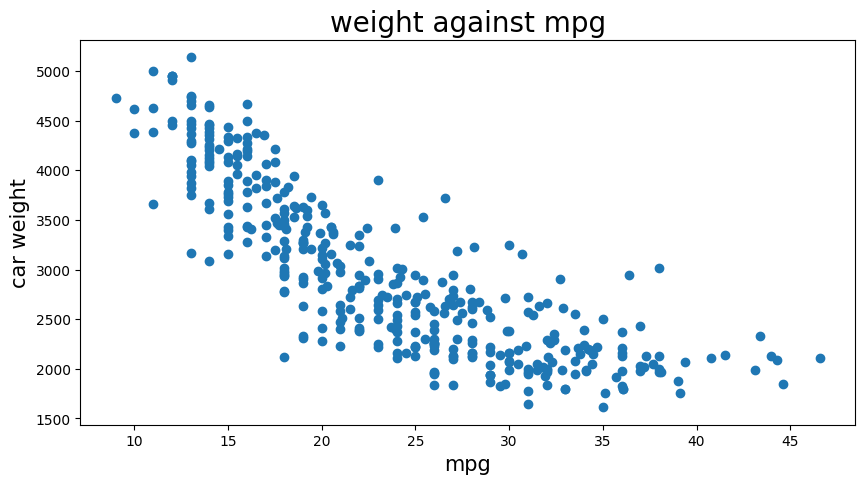

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(x = 'mpg', y = 'weight', data = mpg_df)
plt.title("weight against mpg", fontsize = 20)
plt.xlabel("mpg", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

mpg inceases as weight decreses over time, that indecates a stron correlation between them.

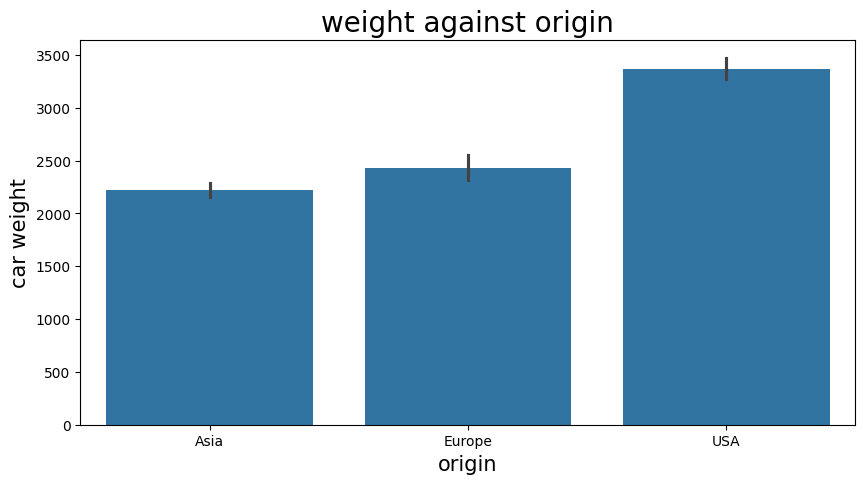

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'origin', y = 'weight', data = mpg_df)
plt.title("weight against origin", fontsize = 20)
plt.xlabel("origin", fontsize = 15)
plt.ylabel("car weight", fontsize = 15)
plt.show()

As expected, USA gets the highest possible weight values, that explains alot about its low mpg and high horsepower.

Asia produces the lightest cars campared to USA and Europe, this also explains itss high mpg and low horsepower.

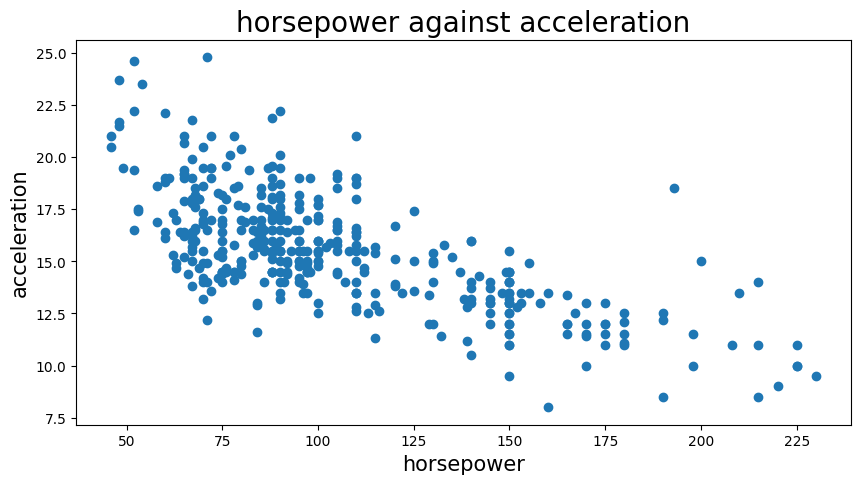

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(x = 'horsepower', y = 'acceleration', data = mpg_df)
plt.title("horsepower against acceleration", fontsize = 20)
plt.xlabel("horsepower", fontsize = 15)
plt.ylabel("acceleration", fontsize = 15)
plt.show()

Wa can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg.

Conclusion

In this section, we'd add the conclusions we draw from the previous visualisations.

As years pass after 1973, there has been a noticable increase in mpg.

As cylinders in the engine increases above 4, MPG decreases and engine horsepower increases. That indicates negative correlation between mpg and 
horsepower.

mpg increases as weight decreses over time, that also indecates a stron correlation between them.

Althogh USA has the biggest count of produced cars, its cars has relatively very low mpg, thus the highest possible weight compared to Asia and Europe

Asia is the leading contry in producing cars with high mpg with a mean close to 30, and it produces the lightest cars

We can spot a negative correlation between acceleration and horepower, this means that it has a positive one with mpg.